In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import datetime
import numpy as np
import pandas as pd
import os 
from pandas import ExcelFile
from keras import models 
from keras import layers
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc


In [39]:
pd.set_option('display.max_colwidth',-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [40]:
pd.set_option('display.float_format', '{:.4f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [41]:
base_dir = "/content/gdrive/My Drive/Colab Notebooks/data/0928_final"
train_file = "2020train.csv"
test_file = "2020test.csv"


train_dir = os.path.join(base_dir,train_file)
test_dir = os.path.join(base_dir,test_file)

In [42]:
train_raw = pd.read_csv(train_dir, sep = "," , encoding = "cp949")   
test_raw = pd.read_csv(test_dir, sep = "," , encoding = "cp949")   

In [43]:
train1 = train_raw
test1 = test_raw

In [44]:
train1.info() # 86col , 32519 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    35379 non-null  int64  
 1   방송일시          35379 non-null  object 
 2   노출(분)         35379 non-null  float64
 3   마더코드          35379 non-null  int64  
 4   상품코드          35379 non-null  int64  
 5   상품명           35379 non-null  object 
 6   상품군           35379 non-null  object 
 7   판매단가          35379 non-null  int64  
 8   취급액           35379 non-null  int64  
 9   월             35379 non-null  int64  
 10  일             35379 non-null  int64  
 11  요일            35379 non-null  object 
 12  반기            35379 non-null  int64  
 13  분기            35379 non-null  object 
 14  365일          35379 non-null  int64  
 15  53주차          35379 non-null  int64  
 16  년월일           35379 non-null  object 
 17  시간            35379 non-null  object 
 18  시간hour        35379 non-nu

In [45]:
train_y = pd.DataFrame(train1['취급액boxcox'])

# train_X = train1.drop(['취급액','취급액boxcox','Unnamed: 0','마더코드','상품코드','요일','반기','분기','시간','시간hour','상품명' , '방송일시' , '방송끝나는시간', '시간' , '날짜', '날짜시간','취급액boxcox','브랜드','그룹코드'], axis=1)
# train_X = train_X.drop(['상품군','중분류','소분류','계절','상품명change'], axis=1)
# train_X = train_X.drop(['년월일','365일','53주차','휴일','방송시간','sale단어','비눈여부','비눈여부_평균이상','월_COS','월_SIN'], axis=1)
# # train_X = train_X.drop(['브랜드별_전체횟수','브랜드별_대박횟수','브랜드별_대박확률'], axis=1)
# train_X = train_X.drop(['중분류별_전체횟수','중분류별_대박횟수','중분류별_대박확률'], axis=1)
# train_X = train_X.drop(['소분류별_전체횟수','소분류별_대박횟수','소분류별_대박확률'], axis=1)


In [46]:
train_X = pd.DataFrame(train1, columns=['판매단가', '노출(분)',
'월', '일', '시간hour'
'168시간', '휴일', '방송시간', '매진여부',
'결제수단', '기온', '강수량', '풍속', '습도', '적설',
'전운량', '미세먼지', '초미세먼지', '판매단가순위',
'판매단가rank', '중분류순위', '소분류순위',
'방송내_순서', '방송순서', '판매상품종류수', '그룹코드_전체횟수', '그룹코드_대박횟수',
'그룹코드_대박확률','그룹코드_쪽박횟수', '그룹코드_쪽박확률',
'168시간_COS', '168시간_SIN', '24시간_COS', '24시간_SIN', '그룹코드_쪽박횟수', '그룹코드_쪽박확률',
'방송내_상품종류별_점수', '방송내_상품선호도'])

In [47]:
train_X =pd.get_dummies(train_X)

In [48]:
train_X.info()  # 59 col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   판매단가          35379 non-null  int64  
 1   노출(분)         35379 non-null  float64
 2   월             35379 non-null  int64  
 3   일             35379 non-null  int64  
 4   시간hour168시간   0 non-null      float64
 5   휴일            35379 non-null  int64  
 6   방송시간          35379 non-null  float64
 7   매진여부          35379 non-null  int64  
 8   기온            35379 non-null  float64
 9   강수량           35379 non-null  float64
 10  풍속            35379 non-null  float64
 11  습도            35379 non-null  float64
 12  적설            35379 non-null  float64
 13  전운량           35379 non-null  float64
 14  미세먼지          35379 non-null  float64
 15  초미세먼지         35379 non-null  float64
 16  판매단가순위        35379 non-null  int64  
 17  판매단가rank      35379 non-null  int64  
 18  중분류순위         35379 non-nu

In [49]:
train_data = train_X
train_targets = train_y

In [50]:
test_y = pd.DataFrame(test1['취급액boxcox'])

# test_X = test1.drop(['취급액','취급액boxcox','Unnamed: 0','마더코드','상품코드','요일','반기','분기','시간','시간hour','상품명' , '방송일시' , '방송끝나는시간', '시간' , '날짜', '날짜시간','취급액boxcox','브랜드','그룹코드'], axis=1)
# test_X = test_X.drop(['상품군','중분류','소분류','계절','상품명change'], axis=1)
# test_X = test_X.drop(['년월일','365일','53주차','휴일','방송시간','sale단어','비눈여부','비눈여부_평균이상','월_COS','월_SIN'], axis=1)

# # test_X = test_X.drop(['브랜드별_전체횟수','브랜드별_대박횟수','브랜드별_대박확률'], axis=1)
# test_X = test_X.drop(['중분류별_전체횟수','중분류별_대박횟수','중분류별_대박확률'], axis=1)
# test_X = test_X.drop(['소분류별_전체횟수','소분류별_대박횟수','소분류별_대박확률'], axis=1)


In [51]:
test_X = pd.DataFrame(test1, columns=['판매단가', '노출(분)',
'월', '일', '시간hour'
'168시간', '휴일', '방송시간', '매진여부',
'결제수단', '기온', '강수량', '풍속', '습도', '적설',
'전운량', '미세먼지', '초미세먼지', '판매단가순위',
'판매단가rank', '중분류순위', '소분류순위',
'방송내_순서', '방송순서', '판매상품종류수', '그룹코드_전체횟수', '그룹코드_대박횟수',
'그룹코드_대박확률','그룹코드_쪽박횟수', '그룹코드_쪽박확률',
'168시간_COS', '168시간_SIN', '24시간_COS', '24시간_SIN', '그룹코드_쪽박횟수', '그룹코드_쪽박확률',
'방송내_상품종류별_점수', '방송내_상품선호도'])

In [52]:
test_X =pd.get_dummies(test_X)

In [53]:
test_X.info()  # 59col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   판매단가          2716 non-null   int64  
 1   노출(분)         2716 non-null   float64
 2   월             2716 non-null   int64  
 3   일             2716 non-null   int64  
 4   시간hour168시간   0 non-null      float64
 5   휴일            2716 non-null   int64  
 6   방송시간          2716 non-null   float64
 7   매진여부          2716 non-null   int64  
 8   기온            2716 non-null   float64
 9   강수량           2716 non-null   float64
 10  풍속            2716 non-null   float64
 11  습도            2716 non-null   float64
 12  적설            2716 non-null   float64
 13  전운량           2716 non-null   float64
 14  미세먼지          2716 non-null   float64
 15  초미세먼지         2716 non-null   float64
 16  판매단가순위        2716 non-null   int64  
 17  판매단가rank      2716 non-null   int64  
 18  중분류순위         2716 non-null 

In [54]:

test_data = test_X
test_targets = test_y

# scaling


In [55]:
# min max scaler 

mm_scaler = MinMaxScaler()

train_data_scaled = mm_scaler.fit_transform(train_data)
test_data_scaled = mm_scaler.transform(test_data)

train_data = train_data_scaled
test_data = test_data_scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [56]:
# ## 정규화  : test도 train의 평균, 표준편차 값으로 정규화를 한다 ##
# mean = train_data.mean(axis=0)
# train_data -= mean
# std = train_data.std(axis=0)
# train_data /= std

# test_data -= mean
# test_data /= std

In [57]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import nn
from tensorflow.keras.backend import shape
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.models import Model, Sequential, load_model
from keras.layers import BatchNormalization
from tensorflow.keras.utils import get_custom_objects
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model


def Mish(x):
    return x * K.tanh(K.softplus(x))

get_custom_objects().update({'mish': Mish})

In [58]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(32, activation='mish',
                           input_shape=(train_data.shape[1],)))  # train data 의 col 수만큼 입력 
    
    model.add(BatchNormalization())
    model.add(layers.Dense(64, activation='mish'))
    model.add(Dropout(0.5))

    model.add(BatchNormalization())
    model.add(layers.Dense(32, activation='mish'))
    model.add(Dropout(0.5))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mape', metrics=['mae'])   # 3. 모델 학습과정 설정하기
    return model

In [59]:
k = 4          ## k - fold  횟수

num_val_samples = len(train_data) // k
num_epochs = 3
BATCH_SIZE = 64
all_scores = []
all_mape_histories=[]


for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)



filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(num_epochs, BATCH_SIZE)
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=100,         # N회 Epoch동안 개선되지 않는다면 종료
                             )

hist = model.fit(train_data, train_targets, 
      validation_data=(val_data, val_targets),
      epochs=num_epochs, 
      batch_size=BATCH_SIZE, 
      callbacks=[checkpoint, earlystopping], # checkpoint, earlystopping 콜백
     )


val_mape, val_mae = model.evaluate(val_data, val_targets, verbose=1)
all_scores.append(val_mape)

# 나중을 위해서 모형 저장해두기
model.save("d.h5")
print("Saved model to disk.")

mape_history = hist.history['val_loss']
all_mape_histories.append(mape_history)  

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
Epoch 1/3
531/553 [===========================>..] - ETA: 0s - loss: nan - mae: nan
Epoch 00001: val_loss did not improve from inf
553/553 [==============================] - 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/3
527/553 [===========================>..] - ETA: 0s - loss: nan - mae: nan
Epoch 00002: val_loss did not improve from inf
553/553 [==============================] - 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/3
540/553 [============================>.] - ETA: 0s - loss: nan - mae: nan
Epoch 00003: val_loss did not improve from inf
277/277 [==============================] - 0s 971us/step - loss: nan - mae: nan
Saved model to disk.


In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

# Train 그래프


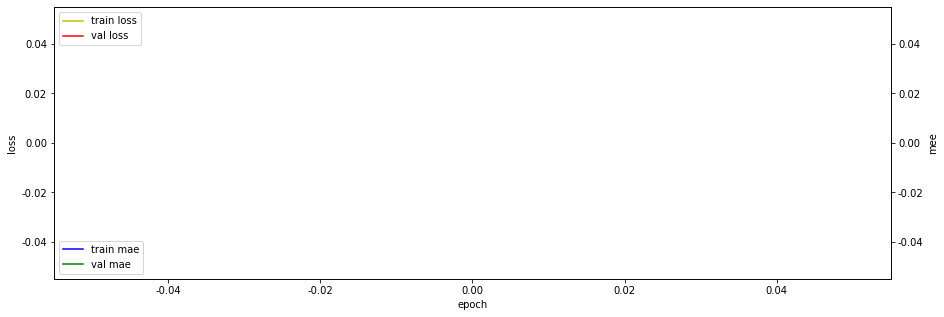

In [61]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss 

acc_ax.plot(hist.history['mae'], 'b', label='train mae')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mee')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

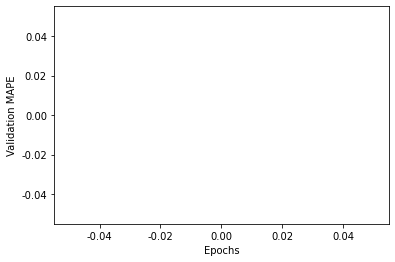

In [62]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mape_history = smooth_curve(hist.history['val_loss'][100:])

plt.plot(range(1, len(smooth_mape_history) + 1), smooth_mape_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.show()

# TEST

In [63]:
# from tensorflow.keras.models import load_model

# model = load_model('checkpoint-epoch-500-batch-64-trial-001.h5', custom_objects={'Mish':Mish})
# model = load_model('d.h5', custom_objects={'Mish':Mish})

OSError: ignored

In [ ]:
test_mape_score, test_mae_score = model.evaluate(test_data, test_targets)


In [ ]:
import matplotlib.pyplot as plt

# test data에 대한 예측값
y_pred = model.predict(test_data)

plt.figure(figsize=(5,5))  # 그림 가로, 세로 크기
plt.scatter(test_targets, y_pred, label="취급액 boxcox 예측", s=3)  #test data의 실제 y값과 예측 y값을 입력
plt.title('취급액 boxcox 예측')
plt.xlabel('y_actual')   # X축 이름
plt.ylabel('y_predicted')# Y축 이름
plt.legend()
plt.xlim((50,350))  # X축 표시 범위
plt.ylim((50,350))  # Y축 표시 범위
plt.show()
# save_fig("prediction result")

# 취급액 BOXCOX를 다시 취급액으로 변환


In [ ]:
def original_target(boxcox):
    return (0.2222222 * boxcox +1)**(1/0.2222222)

In [ ]:
y_pred_original =original_target(y_pred)
test_y_original =original_target(test_y)

In [ ]:
y_pred_df = pd.DataFrame(y_pred_original)
test_y_df = pd.DataFrame(test_y_original)

In [ ]:
# col 이름 맞춰주기 
y_pred_df.columns = ['취급액']
test_y_df.columns = ['취급액']



# 취급액으로 변환한 MAPE


In [ ]:
real_MAPE = ((abs(test_y_df - y_pred_df)/test_y_df).sum())/len(test_y_df)*100

print(real_MAPE)

# 예측한 취급액 저장 


In [ ]:
base_dir_excel = "/content/gdrive/My Drive/Colab Notebooks/result/y_pred"
base_dir_model = "/content/gdrive/My Drive/Colab Notebooks/result/model"

In [ ]:
now = datetime.datetime.now()

In [ ]:
excel_nm = "{}_epoch_{}_batch_{}.xlsx".format(now,num_epochs,BATCH_SIZE)


In [ ]:
xlxs_dir = os.path.join(base_dir_excel, excel_nm) 

In [ ]:
# keras.models.save_model(model, base_dir_model, overwrite=True, include_optimizer=True)
models.save_model(model, base_dir_model, overwrite=True, include_optimizer=True)

In [ ]:
y_pred_df.to_excel(xlxs_dir, # directory and file name to write

            sheet_name = 'Sheet1', 
            na_rep = 'NaN', 
            float_format = "%.2f", 
            header = True, 
            #columns = ["group", "value_1", "value_2"], # if header is False
            index = True, 
            index_label = "id", 
            startrow = 1, 
            startcol = 1, 
            #engine = 'xlsxwriter', 
            freeze_panes = (2, 0)
            ) 


In [ ]:

y_pred_df = pd.DataFrame(y_pred_original)
test_y_df = pd.DataFrame(test_y_original)
